# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

In [64]:
import numpy as np
import pylab as plt
import swyft
import torch

In [74]:
DEVICE = 'cuda:0'
NDIM = 2  # Dimensionality of parameter z
NROUNDS = 1  # Optimization rounds
N_TRAIN = 30
N_BATCH = 3

In [75]:
# Generative model, x~p(x|z)
def model(z, sigma = 0.1):
    z = z - 0.5
    x = z[0] - z[1] + z[0]**2 + z[1]**2
    n = np.random.randn(*x.shape)*sigma    
    return np.array([x + n])

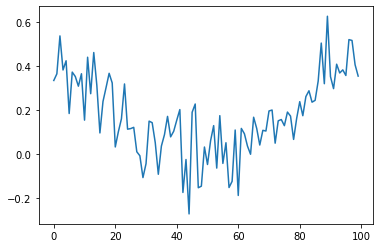

In [76]:
z = np.linspace(0, 1, 100)
z = z.repeat(2).reshape(100,2)
x = [model(z0) for z0 in z]
plt.plot(x)

In [77]:
z0 = np.ones(NDIM)*0.5
x0 = model(z0, sigma = 1e-6)
x0

array([5.88075356e-07])

In [78]:
sw = swyft.SWYFT(model, NDIM, x0, device = DEVICE)

In [79]:
sw.round(n_sims = 10000, n_train = [N_TRAIN, N_TRAIN, N_TRAIN], lr = [1e-3, 1e-4, 1e-5], n_batch = N_BATCH)

100%|██████████| 10000/10000 [00:00<00:00, 71028.02it/s]

Round:  0
Generate samples from constrained prior: z~pc(z)
Generate corresponding draws x ~ p(x|z)



 13%|█▎        | 4/30 [00:00<00:00, 39.26it/s]

Network optimization


100%|██████████| 30/30 [00:00<00:00, 41.01it/s]


In [81]:
combinations = [[0, 1]]
net = swyft.Network(1, 1, pdim = 2).to(DEVICE)
xz = sw.xz_store[0]

In [82]:
losses = swyft.train(net, xz, device = DEVICE, n_batch = 3, combinations = combinations)

100%|██████████| 1000/1000 [00:27<00:00, 36.54it/s]


In [83]:
z = swyft.get_z(xz)
tmp = swyft.estimate_lnL(net, x0, z, sort = False, device = DEVICE, normalize = False, combinations = combinations)

In [84]:
zp = tmp[0]['z'] 
xp = tmp[0]['lnL']

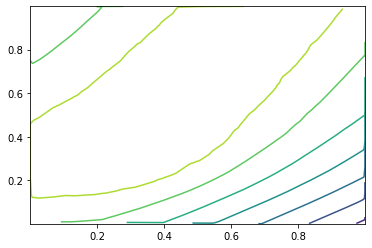

In [85]:
plt.tricontour(zp[:,0], zp[:,1], xp)